In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,roc_auc_score
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
df = pd.read_csv('../fifa_dataset2.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [5]:
columns_feature_selection = ['Age','Nationality','Overall','Value','Wage','Preferred Foot','Body Type','Jersey Number',
'Joined','Contract Valid Until','Height','Finishing','ShortPassing','Volleys','Curve','LongPassing','Acceleration',
'Reactions','Balance','Strength','LongShots','Interceptions','Positioning','Vision','Composure','StandingTackle',
'GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause']

In [6]:
df1 = df[columns_feature_selection]

# Regression

In [68]:
X = df1[df1.columns[1:]]
y = df1['Release Clause']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Linear Regression

In [70]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [71]:
print(regr.score(X_test, y_test))

1.0


In [72]:
y_pred = regr.predict(X_test)

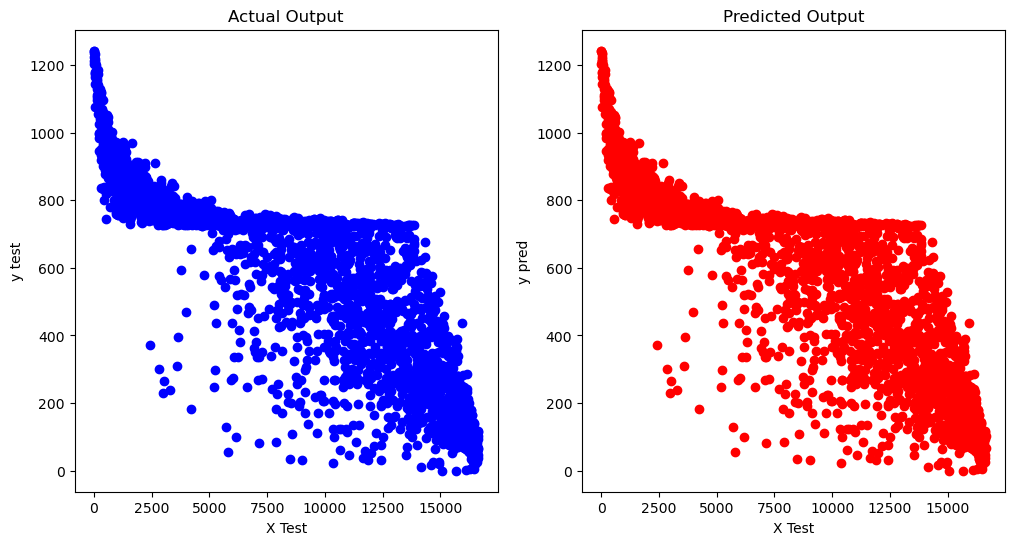

In [73]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_test.index, y_test, color ='b')
plt.title('Actual Output')
plt.xlabel('X Test')
plt.ylabel('y test')
plt.subplot(1, 2, 2)
plt.scatter(X_test.index, y_pred, color ='red')
plt.title('Predicted Output')
plt.xlabel('X Test')
plt.ylabel('y pred')
plt.savefig("Actual Output vs Predicted Output.pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

In [74]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.3240992727523686e-13
MSE: 2.985479222967656e-26
RMSE: 1.7278539356576574e-13


## Polynomial Regression

In [77]:
from sklearn.preprocessing import PolynomialFeatures

In [78]:
poly = PolynomialFeatures(degree=3, include_bias=False)

In [80]:
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
print(poly_reg_model.intercept_, poly_reg_model.coef_)

1.200968426928739e-07 [ 2.79841944e-10  1.74709562e-08 -1.57548759e-10 ... -7.72125419e-15
 -4.05925293e-16  1.11022302e-16]


In [83]:
y_predicted = poly_reg_model.predict(poly_features)

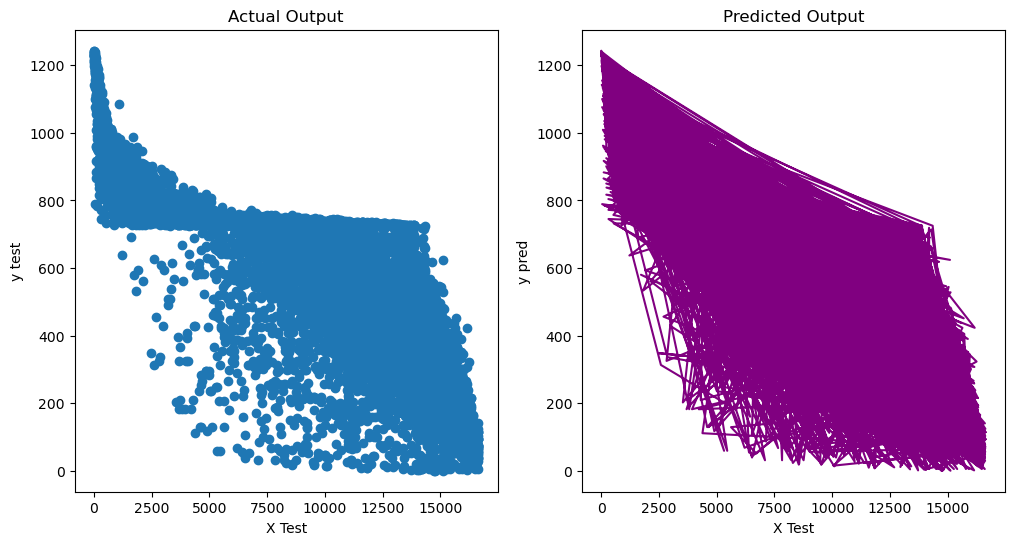

In [82]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_train.index, y_train)
plt.title('Actual Output')
plt.xlabel('X Test')
plt.ylabel('y test')
plt.subplot(1, 2, 2)
plt.plot(X_train.index, y_predicted, color='purple')
plt.title('Predicted Output')
plt.xlabel('X Test')
plt.ylabel('y pred')
# plt.savefig("Actual Output vs Predicted Output.pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

## Lasso Regression

In [85]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train,y_train)
print(clf.coef_)
print(clf.intercept_)

[-0.          0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.          0.99999838]
0.0009808645017983508


In [86]:
y_pred = clf.predict(X_test)

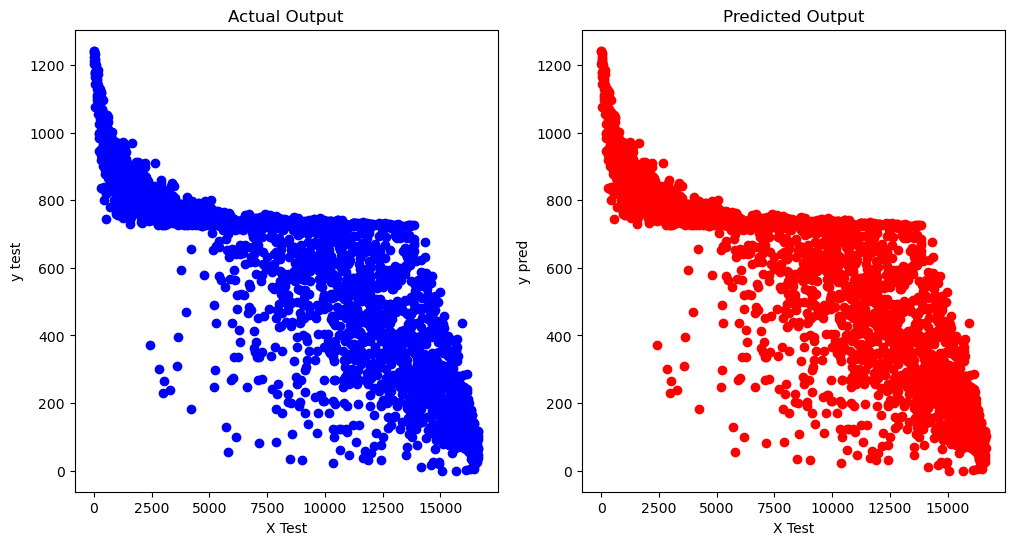

In [88]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_test.index, y_test, color ='b')
plt.title('Actual Output')
plt.xlabel('X Test')
plt.ylabel('y test')
plt.subplot(1, 2, 2)
plt.scatter(X_test.index, y_pred, color ='red')
plt.title('Predicted Output')
plt.xlabel('X Test')
plt.ylabel('y pred')
# plt.savefig("Actual Output vs Predicted Output.pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

In [89]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.00034066316919114997
MSE: 1.6583755159695895e-07
RMSE: 0.00040723156999053863


## Ridge Regression

In [90]:
from sklearn.linear_model import Ridge

In [91]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge()

In [93]:
y_pred = clf.predict(X_test)

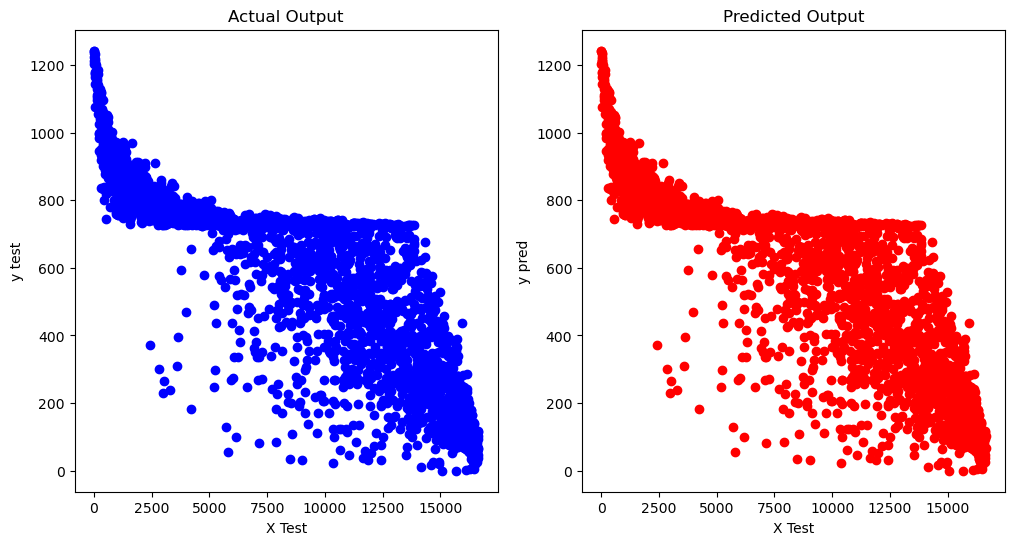

In [94]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_test.index, y_test, color ='b')
plt.title('Actual Output')
plt.xlabel('X Test')
plt.ylabel('y test')
plt.subplot(1, 2, 2)
plt.scatter(X_test.index, y_pred, color ='red')
plt.title('Predicted Output')
plt.xlabel('X Test')
plt.ylabel('y pred')
# plt.savefig("Actual Output vs Predicted Output.pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

In [95]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 5.932983062005252e-07
MSE: 5.063857708957822e-13
RMSE: 7.116078772018914e-07


## Elastic Net Regression

In [97]:
from sklearn.linear_model import ElasticNet

In [98]:
regr = ElasticNet(random_state=0)

In [99]:
regr.fit(X_train, y_train)

ElasticNet(random_state=0)

In [100]:
y_pred = regr.predict(X_test)

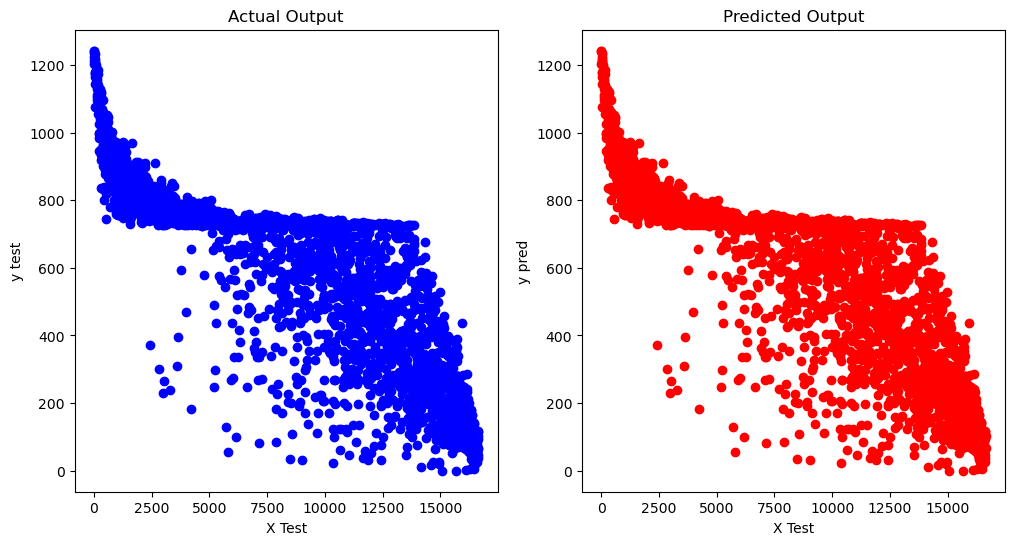

In [101]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_test.index, y_test, color ='b')
plt.title('Actual Output')
plt.xlabel('X Test')
plt.ylabel('y test')
plt.subplot(1, 2, 2)
plt.scatter(X_test.index, y_pred, color ='red')
plt.title('Predicted Output')
plt.xlabel('X Test')
plt.ylabel('y pred')
# plt.savefig("Actual Output vs Predicted Output.pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

In [102]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.003406604042227879
MSE: 1.65834859577694e-05
RMSE: 0.00407228264708743


# Classifiers

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [15]:
df2 = df1.copy()

In [27]:
def change(x):
    if x<600:
        return 0
    else:
        return 1

In [28]:
df2['Release Clause Cat'] = df2['Release Clause'].apply(change)

In [29]:
df2.drop('Release Clause',axis=1,inplace=True)

In [35]:
X = df2[df2.columns[1:]]
y = df2['Release Clause Cat']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

## Decision Tree

[[ 593    0]
 [   0 1072]]


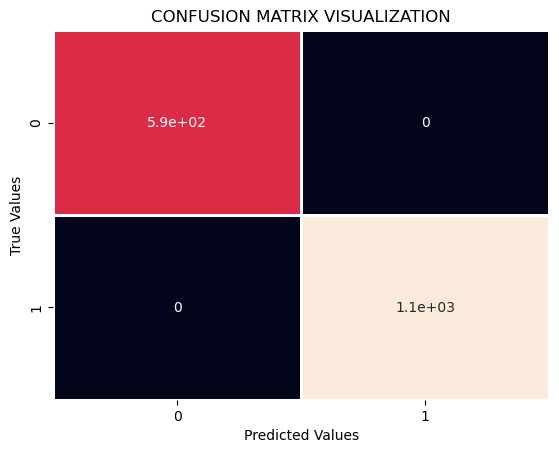

In [37]:
model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.show()

In [38]:
res = classification_report(y_test,y_pred)
print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       593
           1       1.00      1.00      1.00      1072

    accuracy                           1.00      1665
   macro avg       1.00      1.00      1.00      1665
weighted avg       1.00      1.00      1.00      1665



# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [40]:
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Confusion Matrix:
[[ 555   38]
 [  39 1033]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       593
           1       0.96      0.96      0.96      1072

    accuracy                           0.95      1665
   macro avg       0.95      0.95      0.95      1665
weighted avg       0.95      0.95      0.95      1665



## Multiple Models

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [56]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
#     LGBMClassifier(),
    MLPClassifier()
]

In [57]:
# Iterate through models and evaluate their performance
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    # Print or store the evaluation metrics for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

Model: LogisticRegression
Accuracy: 0.95
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
ROC-AUC: 0.95
Confusion Matrix:
[[ 555   38]
 [  39 1033]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       593
           1       0.96      0.96      0.96      1072

    accuracy                           0.95      1665
   macro avg       0.95      0.95      0.95      1665
weighted avg       0.95      0.95      0.95      1665



Model: DecisionTreeClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00
Confusion Matrix:
[[ 593    0]
 [   0 1072]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       593
           1       1.00      1.00      1.00      1072

    accuracy                           1.00      1665
   macro avg       1.00      1.00      1.00      1665
weighted avg       1.00      1.00      1.00      1665



Mode

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
import warnings

# Filter out LightGBM warnings
warnings.filterwarnings("ignore")

In [62]:
# Add these models to the list of models
models.extend([
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RidgeClassifier(),
    SGDClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    HistGradientBoostingClassifier(),
    GaussianProcessClassifier(),
    MLPClassifier(max_iter=1000),
    VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
#         ('lgbm', LGBMClassifier())
    ]),
    StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
#         ('lgbm', LGBMClassifier())
    ], final_estimator=LogisticRegression())
])

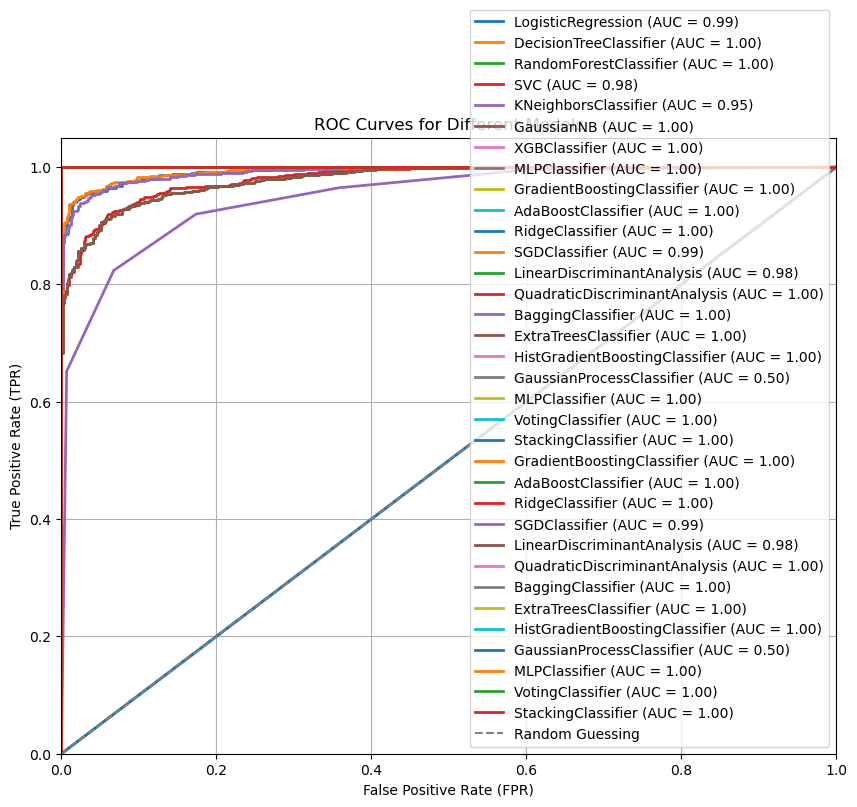

In [67]:
roc_data = {}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        # Get predicted probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict directly
        if hasattr(model, "decision_function"):
            y_pred_prob = model.decision_function(X_test)
        else:
            y_pred_prob = model.predict(X_test)
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Store ROC curve data
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)

# Show the plot
plt.show()

# Evalml

In [103]:
!pip install evalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 4.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 2.1 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.2/580.2 kB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Preparing met

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 1.3 MB/s eta 0:00:0000:0100:010m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 2.3 MB/s eta 0:00:00a 0:00:01


  error: subprocess-exited-with-error
  
  × Building wheel for lightgbm (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [46 lines of output]
      2023-10-03 15:51:04,544 - scikit_build_core - INFO - CMake version: 3.27.6
      *** scikit-build-core 0.5.1 using CMake 3.27.6 (wheel)
      2023-10-03 15:51:04,546 - scikit_build_core - INFO - Build directory: /private/var/folders/9x/sg299rqx48g64901_k2jkppm0000gq/T/tmpndv5eo50/build
      *** Configuring CMake...
      2023-10-03 15:51:04,560 - scikit_build_core - INFO - Ninja version: 1.11.1
      2023-10-03 15:51:04,560 - scikit_build_core - WARNING - libdir/ldlibrary: /Users/student/anaconda3/lib/libpython3.9.a is not a real file!
      2023-10-03 15:51:04,560 - scikit_build_core - WARNING - Can't find a Python library, got libdir=/Users/student/anaconda3/lib, ldlibrary=libpython3.9.a, multiarch=darwin, masd=None
      loading initial cache file /var/folders/9x/sg299rqx48g64901_k2jkppm0000gq/T/tmpndv5eo50/build/CMake

  Created wheel for PyMeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=731999 sha256=19ca5c809573ea65e9a557c3fd6dd13c591da6a266dd8f546f063f2fbdccefae
  Stored in directory: /Users/student/Library/Caches/pip/wheels/04/1f/e5/8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built lime PyMeeus
Failed to build lightgbm vowpalwabbit
ERROR: Could not build wheels for lightgbm, which is required to install pyproject.toml-based projects
